In [1]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = Path('images')
path

Path('images')

In [4]:
# test, re.findall(r'images/(.+)/',test))

In [5]:
def get_y(r):
    return [Path(r).parent.name]
bears = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_y,
    item_tfms=Resize(128))

In [6]:
dls = bears.dataloaders(path)
dls.vocab

['Black', 'Grizzly', 'Teddy']

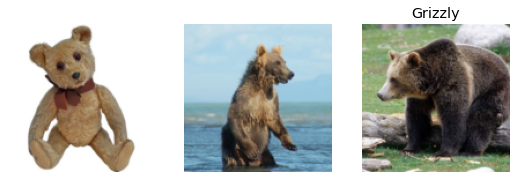

In [7]:
dls.show_batch(nrows=1, ncols=3)

In [8]:
learn = cnn_learner(dls, resnet18)

In [9]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,0.824781,0.427245,00:04


epoch,train_loss,valid_loss,time
0,0.385272,0.161589,00:01
1,0.291677,0.102649,00:01
2,0.224751,0.092853,00:01
3,0.177000,0.083640,00:01
4,0.142655,0.080210,00:01


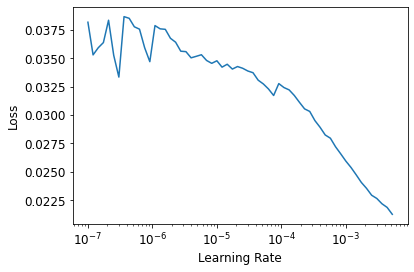

In [10]:
lr_min, lr_steep = learn.lr_find()

In [11]:
lr_min, lr_steep

(0.0005248074419796466, 6.309573450380412e-07)

In [12]:
lr = lr_min/10
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,time
0,0.047912,0.077928,00:01
1,0.046163,0.076064,00:01
2,0.040700,0.073416,00:01
3,0.035211,0.068030,00:01
4,0.032064,0.065502,00:01
5,0.029026,0.065741,00:01
6,0.028056,0.065616,00:01
7,0.025608,0.065804,00:01
8,0.023996,0.066988,00:01
9,0.022332,0.067266,00:01


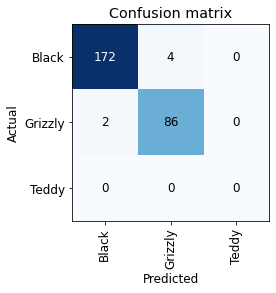

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

,target,predicted,probabilities,loss
0,Grizzly,Black,"tensor([9.6433e-01, 3.9711e-01, 1.8621e-04])",1.4190397262573242
1,Black,,"tensor([0.1934, 0.4037, 0.1193])",0.7622987627983093
2,Black,Black;Grizzly,"tensor([0.5048, 0.6901, 0.1686])",0.6798936128616333
3,Teddy,Grizzly;Teddy,"tensor([0.0074, 0.7484, 0.9366])",0.4842606782913208
4,Grizzly,Black;Grizzly,"tensor([6.5522e-01, 9.5012e-01, 6.9321e-04])",0.3722376227378845
5,Grizzly,Grizzly,"tensor([0.4808, 0.9228, 0.0178])",0.25124186277389526
6,Black,Black,"tensor([0.8958, 0.3872, 0.0985])",0.23449695110321045
7,Black,Black,"tensor([0.9908, 0.4005, 0.0074])",0.17609772086143494
8,Teddy,Teddy,"tensor([0.0160, 0.3130, 0.9993])",0.13077785074710846
9,Black,Black,"tensor([0.9808, 0.3007, 0.0013])",0.12612967193126678


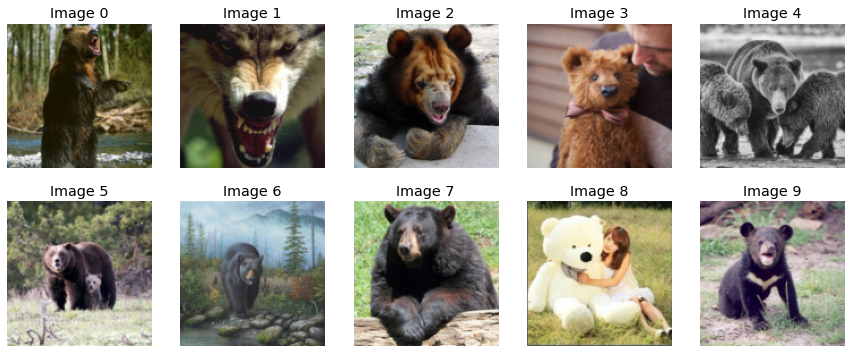

In [17]:
interp.plot_top_losses(10, nrows=2)

In [15]:
dls.loss_func

FlattenedLoss of BCEWithLogitsLoss()